In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gene_id import Gene_IDs
from atac_signal import ATAC_signal
from gene_sets import Gene_sets

import plotting as my_plots
import utilities as ut
import calc_signals as cas

In [2]:
if "gs" not in locals():
    gs = Gene_sets()

if "exp1" not in locals():
    exp1 = ATAC_signal("exp1")

if "exp_mss" not in locals():
    exp_mss = ATAC_signal("exp_metsetset")

if "exp_hrde1" not in locals():
    exp_hrde1 = ATAC_signal("exp_hrde_guy")

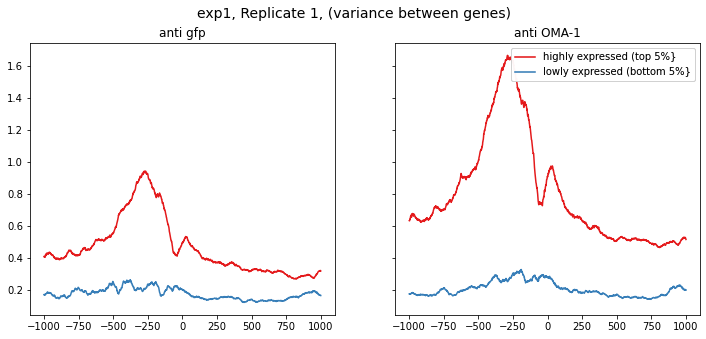

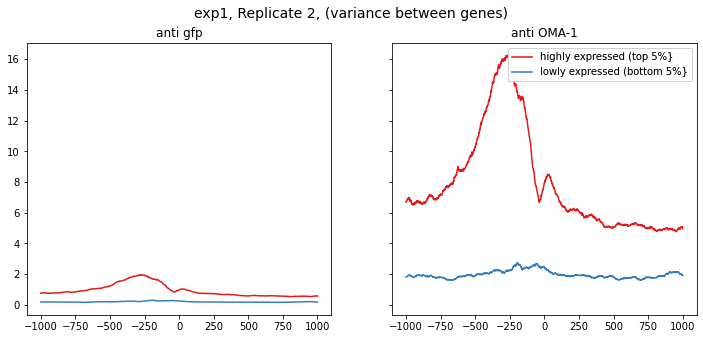

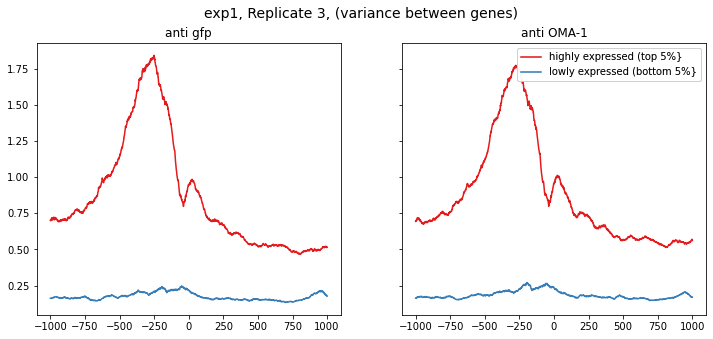

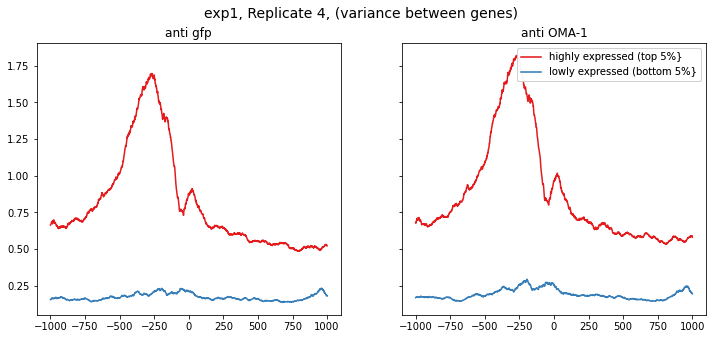

In [3]:
my_plots.plot_groups_signals(exp1, var_type='none')

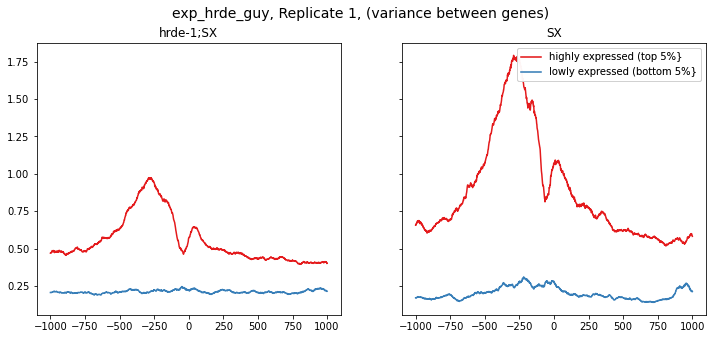

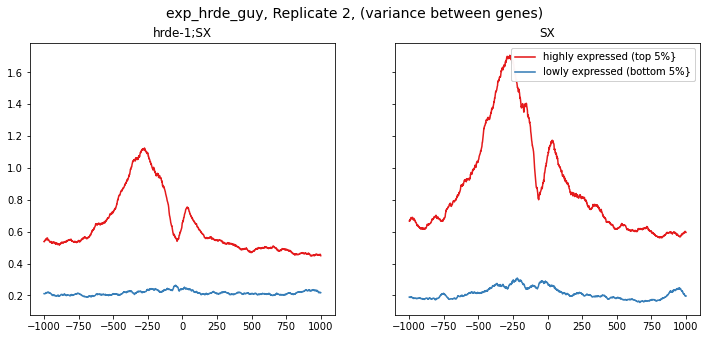

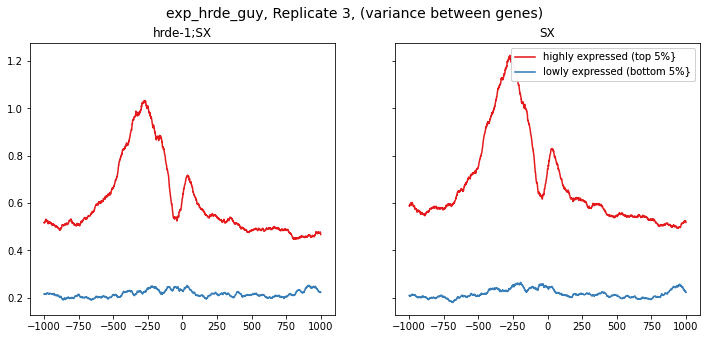

In [4]:
my_plots.plot_groups_signals(exp_hrde1, var_type='none')

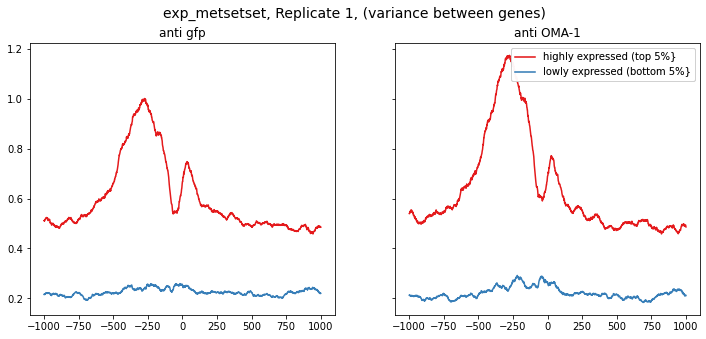

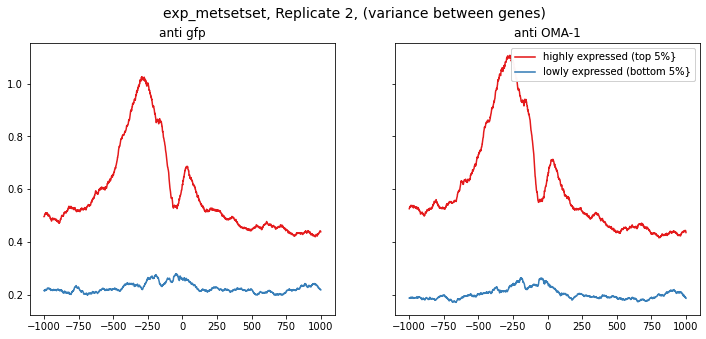

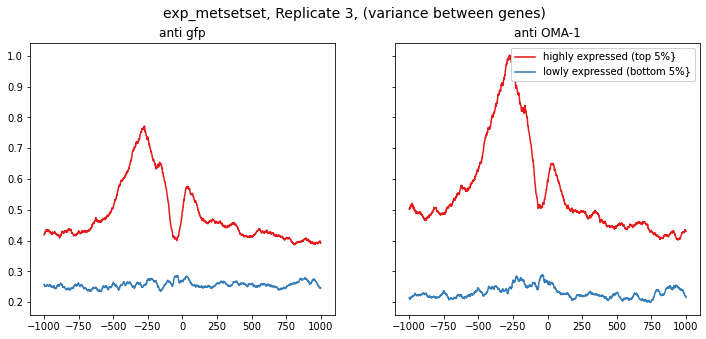

In [5]:
my_plots.plot_groups_signals(exp_mss, var_type='none')

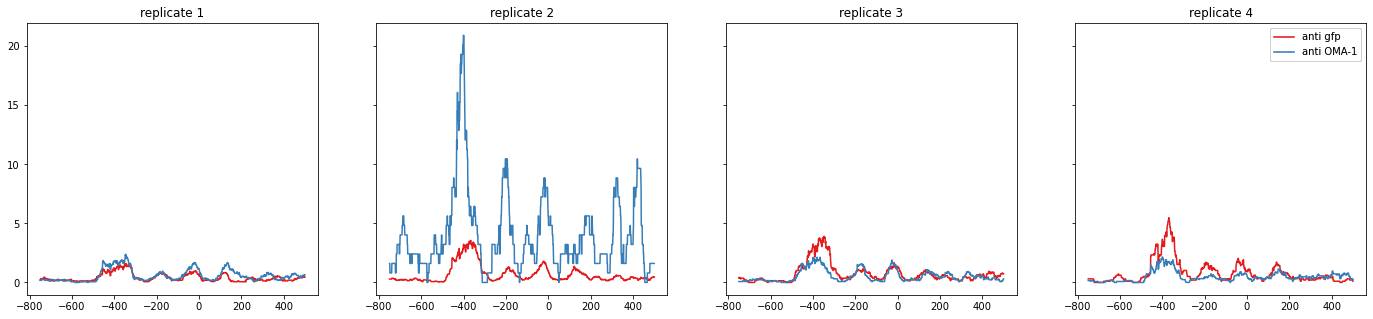

In [6]:
my_plots.plot_signal_gene(exp1, 'oma-1', plot_range=(-750, 500), var_type='sem', mean_flag=False)

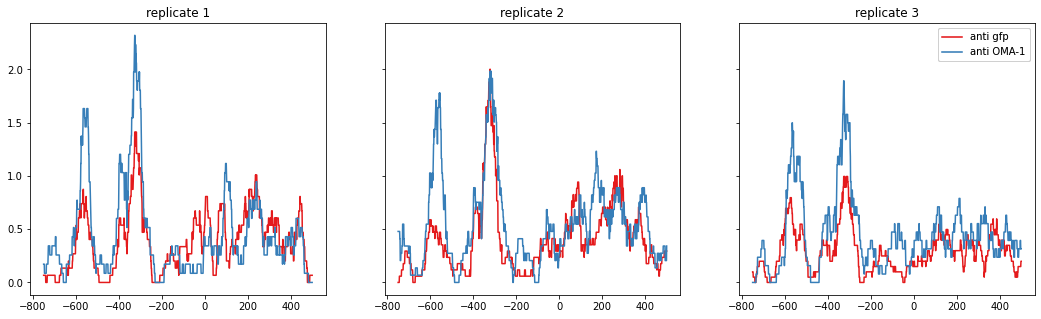

In [7]:
my_plots.plot_signal_gene(exp_mss, 'GFP', plot_range=(-750, 500), var_type='sem', mean_flag=False)

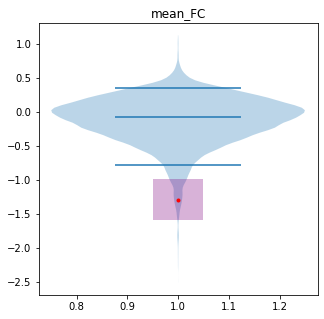

Gene - oma-1

Value:	-1.30
Rank: 185.0 (0.92%)



In [8]:
my_plots.plot_gene_atac_signal_distribution(exp_mss, 'oma-1', mean_flag=True)

In [9]:
## hrde-1 lists:
hrde1_kennedy = gs.get_list('hrde-1-Kennedy')
hrde_FC_sig = gs.get_list('mRNA_isSig')
hrde_up = gs.get_list('mRNA_log2_FC', thresh=0)
hrde_up_sig = ut.intersect_lists(hrde_FC_sig, hrde_up)
hrde_down = gs.get_list('mRNA_log2_FC', thresh=0, bottom=True)
hrde_down_sig = ut.intersect_lists(hrde_FC_sig, hrde_down)
hrde_regulated = ut.intersect_lists(hrde_up_sig, hrde1_kennedy)

hrde1_nearby_up, hrde1_nearby_down = ut.get_nearby_genes_list(hrde_regulated, 2000) # len 75, len 28
hrde1_nearby_up_1200, hrde1_nearby_down_1200 = ut.get_nearby_genes_list(hrde_regulated, 1200) # len 49, len 7

hrde_dic = {'hrde1_kennedy':hrde1_kennedy, 'hrde_reg':hrde_regulated, 'hrde-1 upstream':hrde1_nearby_up, 'hrde down sig':hrde_down_sig}
    

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862


These genes were found by Itamar to be...

gene WBGene00015351:


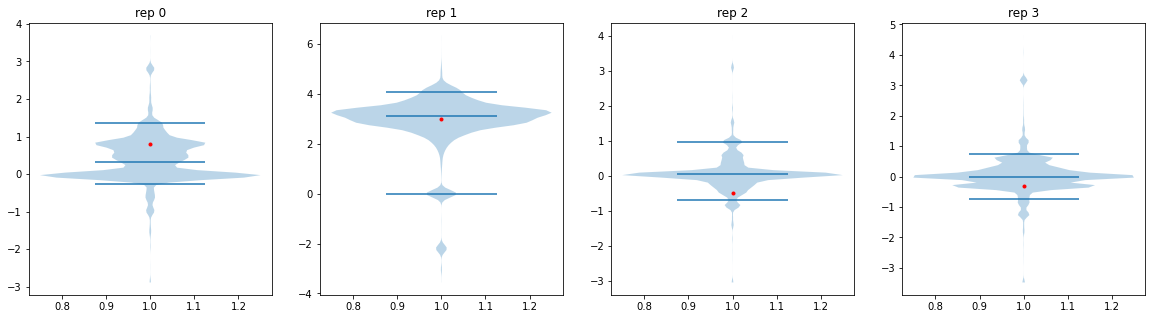

In [10]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00015351', mean_flag=False)

gene WBGene00016177:


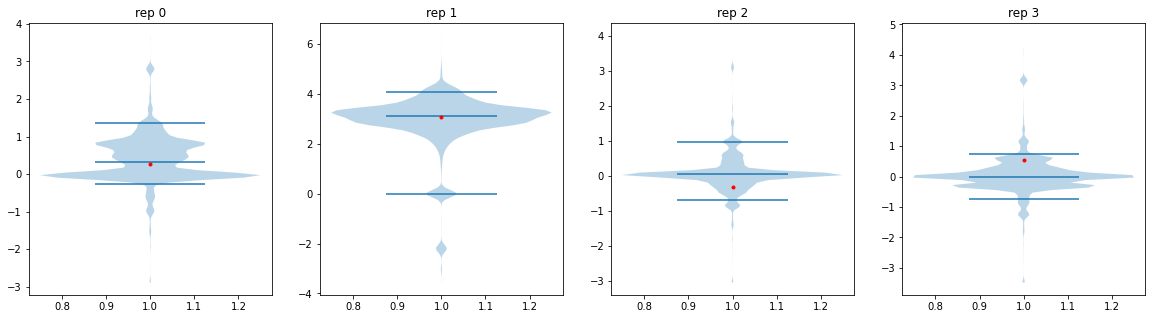

In [11]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00016177', mean_flag=False)

gene WBGene00000224:


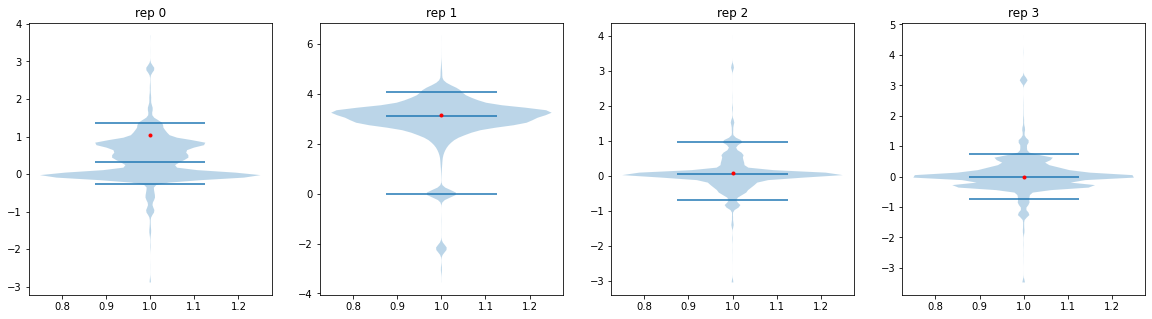

In [12]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00000224', mean_flag=False)

gene WBGene00013100:


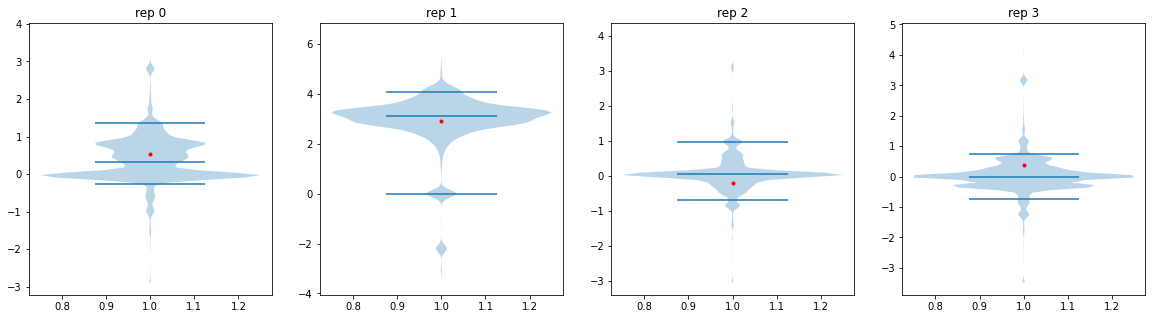

In [13]:
my_plots.plot_gene_atac_signal_distribution(exp1, 'WBGene00013100', mean_flag=False)

bigger than 967 out of 1000 bootstrap iterations


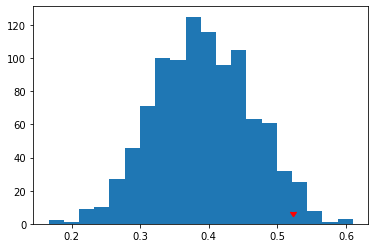

In [14]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 0'], hrde1_nearby_up) # ~99%

bigger than 991 out of 1000 bootstrap iterations


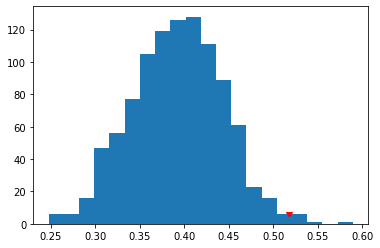

In [15]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 0'], hrde_regulated) #

bigger than 800 out of 1000 bootstrap iterations


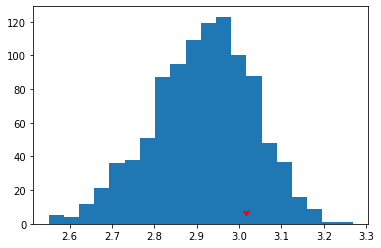

In [16]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 1'], hrde1_nearby_up) # ~1%

bigger than 8 out of 1000 bootstrap iterations


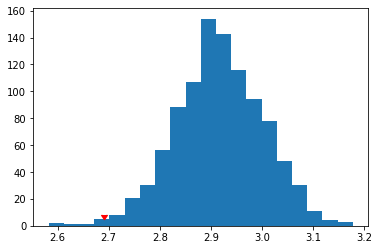

In [17]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 1'], hrde_regulated) #

bigger than 106 out of 1000 bootstrap iterations


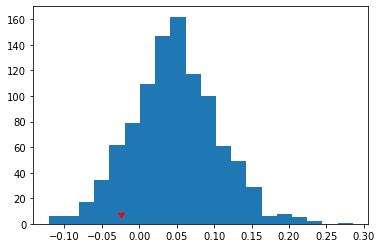

In [18]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 2'], hrde1_nearby_up) # 5%

bigger than 391 out of 1000 bootstrap iterations


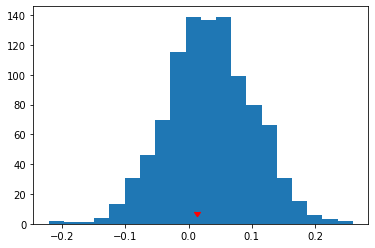

In [19]:
cas.bootstrap_group_score_fc_histogram(exp1.fc['rep 3'], hrde1_nearby_up) # 67%

bigger than 772 out of 1000 bootstrap iterations


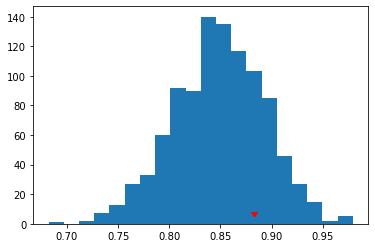

In [20]:
cas.bootstrap_group_score_fc_histogram(exp1.fc.mean(axis=1), hrde1_nearby_up) # 17%

Until now, it was all testing for exp1. Now it is for exp_hrde1, which is supposed to be relevant:

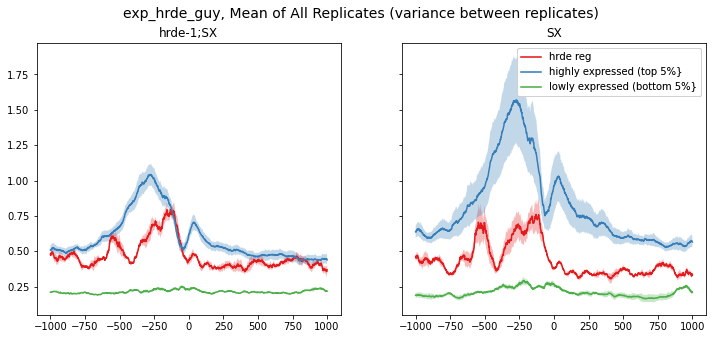

In [21]:
my_plots.plot_groups_signals(exp_hrde1, groups_dic={'hrde reg':hrde_regulated}, mean_flag=True)

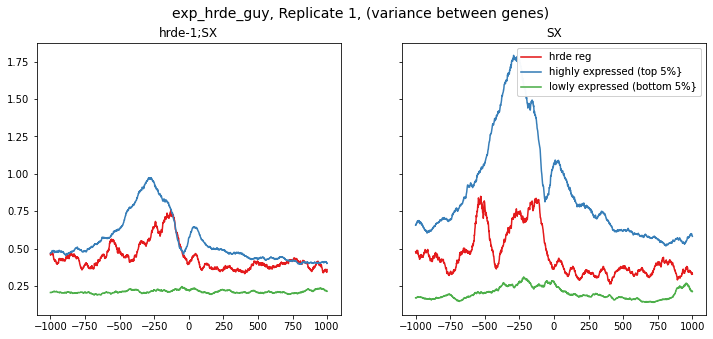

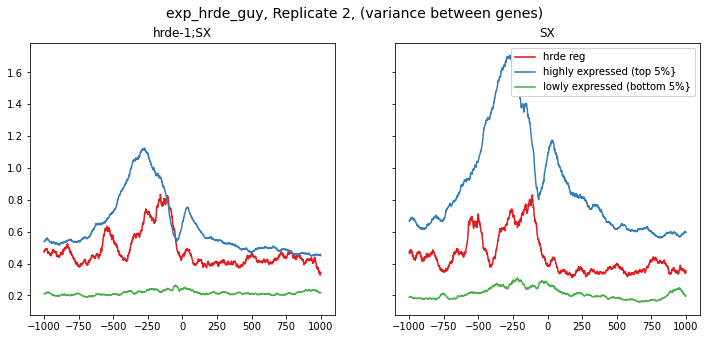

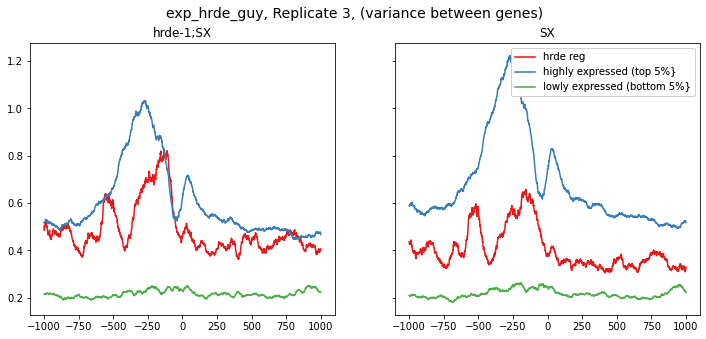

In [22]:
my_plots.plot_groups_signals(exp_hrde1, groups_dic={'hrde reg':hrde_regulated}, mean_flag=False, var_type='none')

bigger than 0 out of 1000 bootstrap iterations


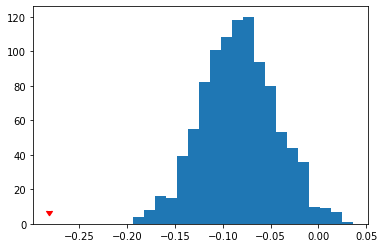

In [23]:
cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), hrde_regulated) # 0%

bigger than 477 out of 1000 bootstrap iterations


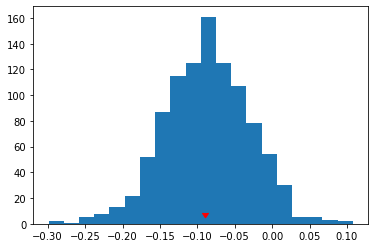

In [24]:
cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), hrde1_nearby_up) # 47%

This looks like the "hrde1_upstream" group has a pretty standard fold_change score! not good for us.

testthe function with random data:

In [25]:
genes_ind = exp1.fc.index
genes_cols = exp1.fc.columns
nums = np.random.rand(len(genes_ind),4)
rand_data = pd.DataFrame(nums, index = genes_ind, columns =genes_cols)

bigger than 104 out of 1000 bootstrap iterations


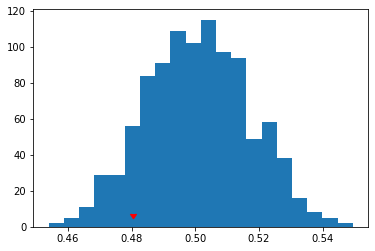

In [26]:
cas.bootstrap_group_score_fc_histogram(rand_data.mean(axis=1), hrde1_nearby_up)

bigger than 444 out of 1000 bootstrap iterations


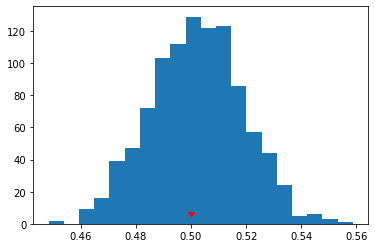

In [27]:
intersected_list = list(set(rand_data.index) & set(hrde1_nearby_up))
rand_data.loc[intersected_list,:]=0.5
cas.bootstrap_group_score_fc_histogram(rand_data.mean(axis=1), hrde1_nearby_up)

Biological questions:

In [28]:
exp_hrde1.exp_df

hrde-1;SX  \
rep                                                      
0                       -1000     -999      -998   ...   
1                       -1000     -999      -998   ...   
2                       -1000     -999      -998   ...   

                                                    SX  
rep                                                     
0                       -1000     -999      -998   ...  
1                       -1000     -999      -998   ...  
2                       -1000     -999      -998   ...

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 1000, num  of genes:3
bigger than 637 out of 1000 bootstrap iterations


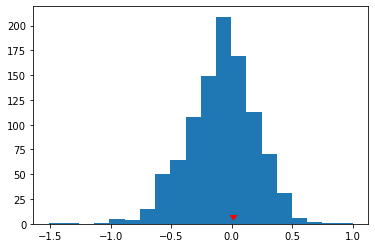

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 1500, num  of genes:15
bigger than 604 out of 1000 bootstrap iterations


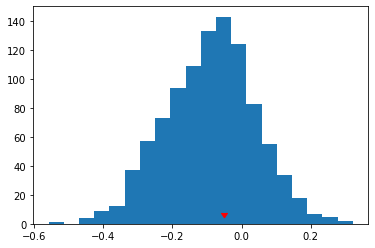

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 2000, num  of genes:28
bigger than 389 out of 1000 bootstrap iterations


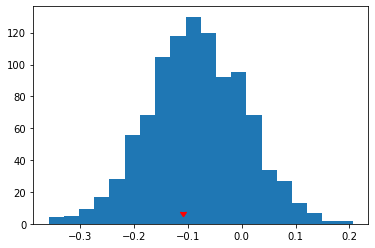

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 3000, num  of genes:55
bigger than 279 out of 1000 bootstrap iterations


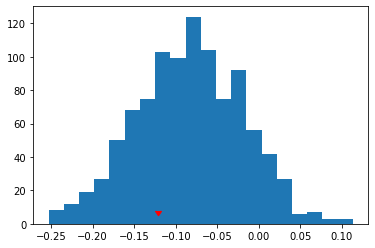

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 5000, num  of genes:91
bigger than 19 out of 1000 bootstrap iterations


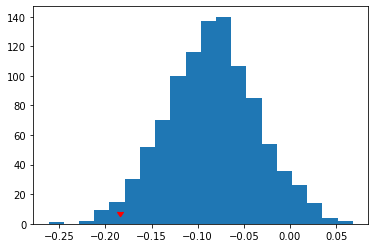

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 10000, num  of genes:205
bigger than 14 out of 1000 bootstrap iterations


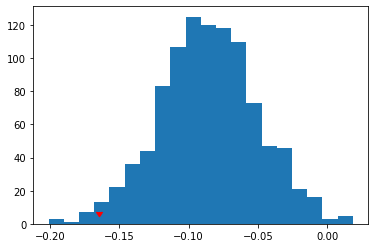

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 15000, num  of genes:316
bigger than 13 out of 1000 bootstrap iterations


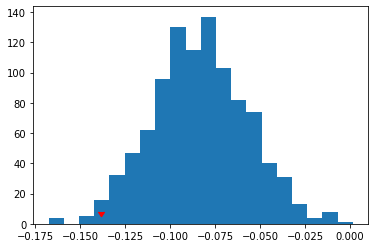

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 25000, num  of genes:523
bigger than 112 out of 1000 bootstrap iterations


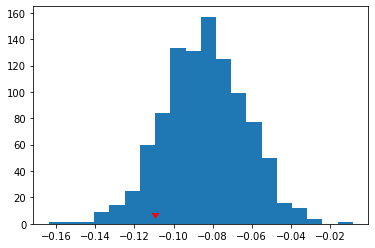

In [29]:
import matplotlib.pyplot as plt 
ds = [1000, 1500, 2000, 3000, 5000, 10000, 15_000, 25_000]
for distance in ds:
    genes_up, genes_down = ut.get_nearby_genes_list(hrde_regulated, distance)
    print(f'for distance: {distance}, num  of genes:{len(genes_down)}')
    cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), genes_down)
    plt.show()



missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 1000, num  of genes:39
bigger than 308 out of 1000 bootstrap iterations


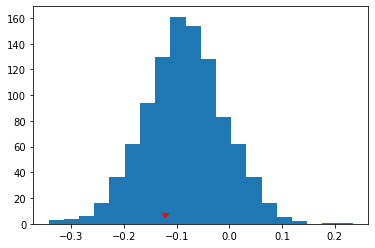

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 1500, num  of genes:59
bigger than 630 out of 1000 bootstrap iterations


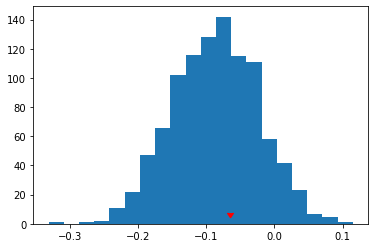

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 2000, num  of genes:75
bigger than 447 out of 1000 bootstrap iterations


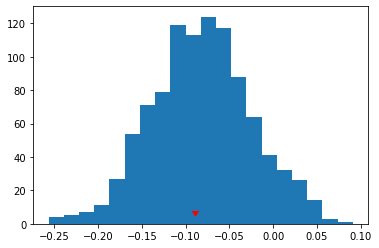

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 3000, num  of genes:108
bigger than 182 out of 1000 bootstrap iterations


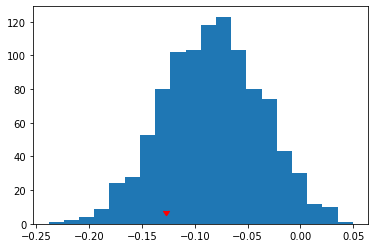

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 5000, num  of genes:162
bigger than 420 out of 1000 bootstrap iterations


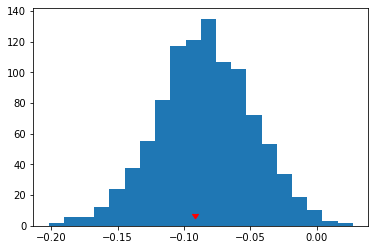

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 10000, num  of genes:313
bigger than 626 out of 1000 bootstrap iterations


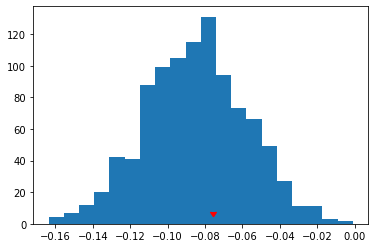

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 15000, num  of genes:450
bigger than 532 out of 1000 bootstrap iterations


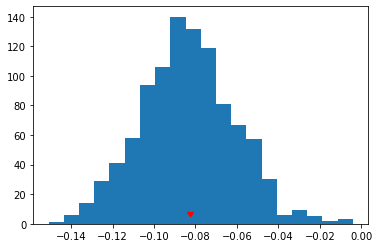

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
for distance: 25000, num  of genes:701
bigger than 285 out of 1000 bootstrap iterations


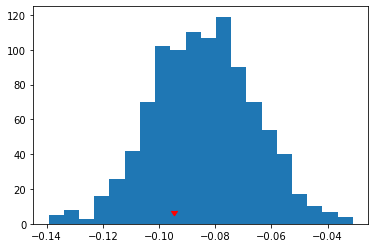

In [30]:
import matplotlib.pyplot as plt 
ds = [1000, 1500, 2000, 3000, 5000, 10000, 15_000, 25_000]
for distance in ds:
    genes_up, genes_down = ut.get_nearby_genes_list(hrde_regulated, distance)
    print(f'for distance: {distance}, num  of genes:{len(genes_up)}')
    cas.bootstrap_group_score_fc_histogram(exp_hrde1.fc.mean(axis=1), genes_up)
    plt.show()

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862


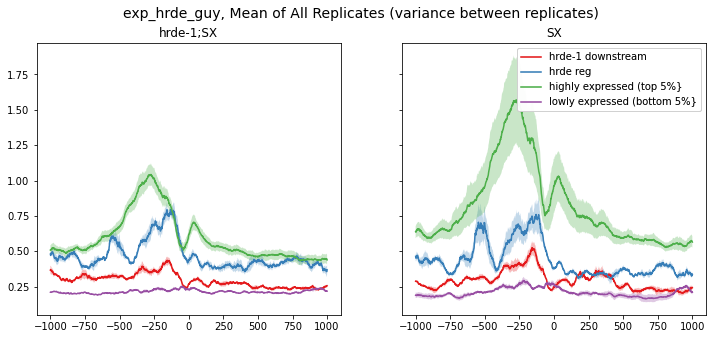

In [31]:
genes_up_10000, genes_down_10000 = ut.get_nearby_genes_list(hrde_regulated, 10_000)
my_plots.plot_groups_signals(exp_hrde1, groups_dic={'hrde-1 downstream':genes_down_10000, 'hrde reg':hrde_regulated}, mean_flag=True)


In [32]:
len(genes_down_10000)

205

In [33]:
len(hrde_up_sig)

383

In [34]:
hrde_up_and_nearby_downstream_10000 = ut.intersect_lists(genes_down_10000, hrde_up_sig)

In [35]:
len(hrde_up_and_nearby_downstream_10000)

18

In [36]:
mrna_fc = gs.big_table['mRNA_log2_FC']

bigger than 1000 out of 1000 bootstrap iterations


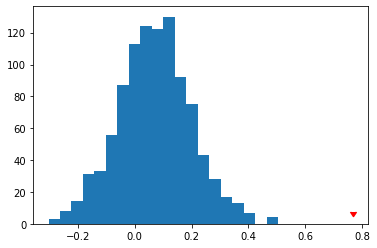

In [37]:
cas.bootstrap_group_score_fc_histogram(mrna_fc, genes_down_10000)

By stander of genes:



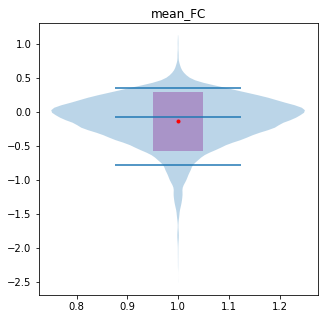

Gene - spr-2

Value:	-0.14
Rank: 8463.0 (42.28%)



In [38]:
my_plots.plot_gene_atac_signal_distribution(exp_mss, 'spr-2', mean_flag=True)

In [39]:
genes_up_15, genes_down_15 = ut.get_nearby_genes_list(hrde_regulated, 15_000)
i_bootstrap_means, _ = cas.bootstrap_group_score(exp_hrde1.fc.mean(axis=1), genes_down_15)



missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
bigger than 38 out of 1000 bootstrap iterations


In [40]:
v_line_mean = i_bootstrap_means.mean()

missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: WBGene00021886
missing gene: WBGene00015989
missing gene: WBGene00010271
missing gene: WBGene00020164
missing gene: WBGene00018862
missing gene: WBGene00000801
missing gene: WBGene00013153
missing gene: WBGene00021673
missing gene: WBGene00021606
missing gene: WBGene00019789
missing gene: WBGene00019517
missing gene: WBGene00045410
missing gene: WBGene00017729
missing gene: 

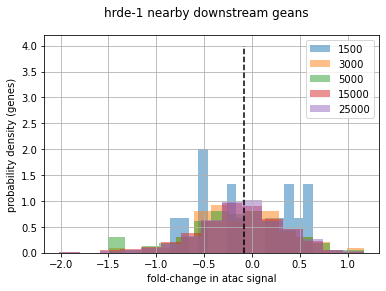

In [41]:
ds = [1500, 3000, 5000, 15_000, 25_000]
for distance in ds:
    genes_up, genes_down = ut.get_nearby_genes_list(hrde_regulated, distance)
    intersected_list = ut.intersect_lists(exp_hrde1.fc.index, genes_down)
    exp_hrde1.fc.loc[intersected_list,:].mean(axis=1).hist(bins=15, alpha=0.5, density=True)

plt.suptitle('hrde-1 nearby downstream geans')
plt.xlabel('fold-change in atac signal')
plt.ylabel('probability density (genes)')
plt.legend(ds)  
plt.vlines(v_line_mean, ymin=0, ymax=4, linestyles='dashed')


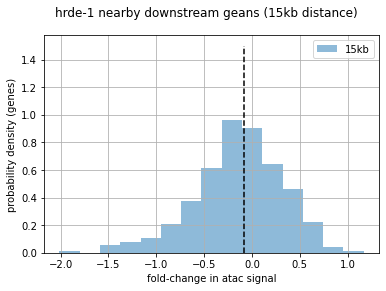

In [42]:
intersected_list_15 = ut.intersect_lists(exp_hrde1.fc.index, genes_down_15)
exp_hrde1.fc.loc[intersected_list_15,:].mean(axis=1).hist(bins=15, alpha=0.5, density=True)

plt.suptitle('hrde-1 nearby downstream geans (15kb distance)')
plt.xlabel('fold-change in atac signal')
plt.ylabel('probability density (genes)')
plt.legend(['15kb'])  
plt.vlines(v_line_mean, ymin=0, ymax=1.5, linestyles='dashed')

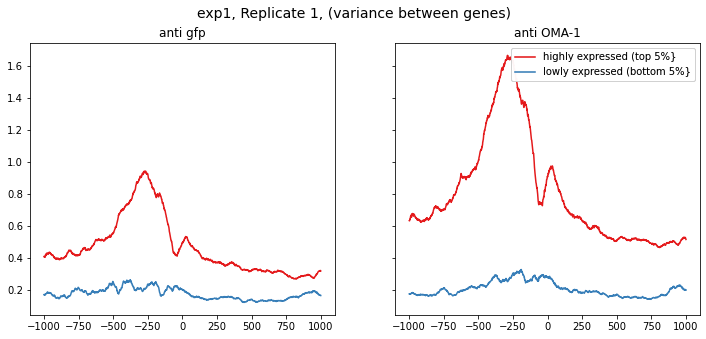

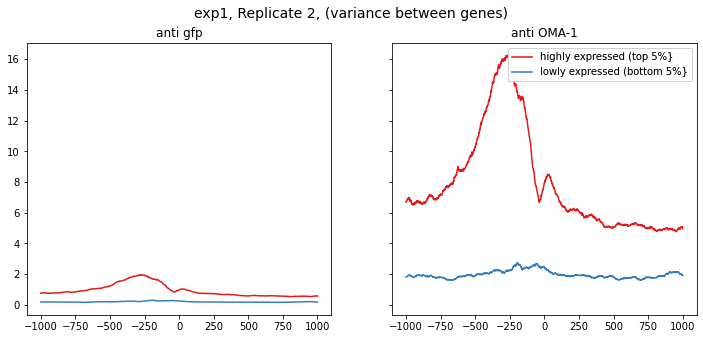

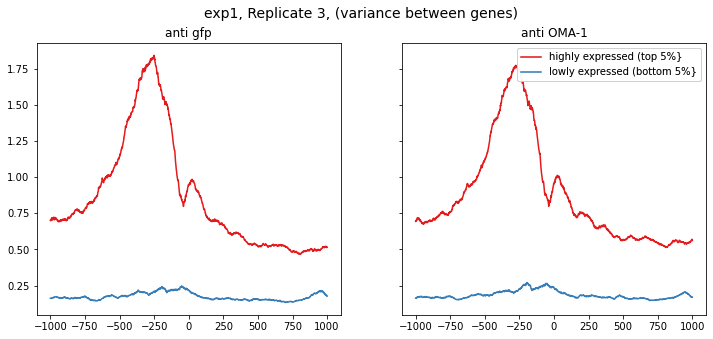

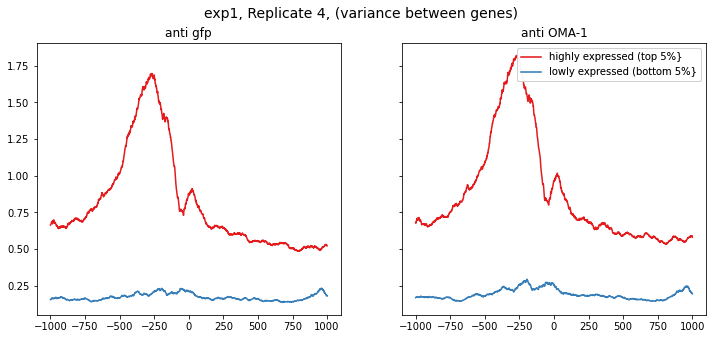

In [43]:
my_plots.plot_groups_signals(exp1, var_type='none')